# Filters

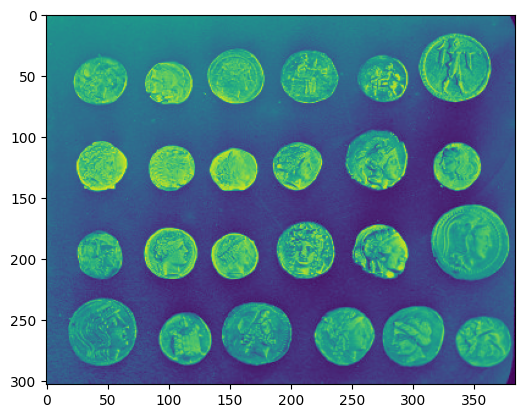

In [16]:
from skimage import data, feature, color, io
import numpy as np
import matplotlib.pyplot as plt

# Load the 'coins' image
image = data.coins()

plt.imshow(image)
plt.show()

### LoG Blob Detection

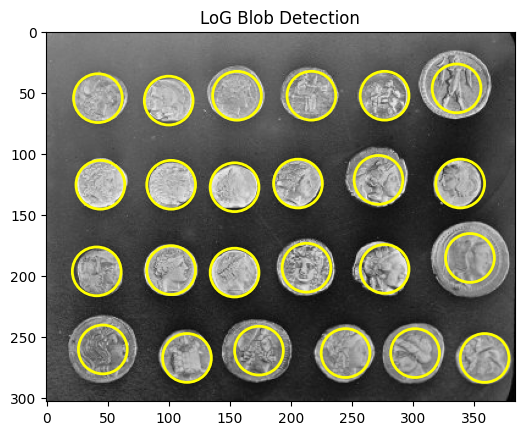

In [17]:
# Detect blobs using LoG (Laplacian of Gaussian)
blobs_log = feature.blob_log(image, min_sigma = 20, max_sigma=50, num_sigma=50, threshold=0.05)

# Plot detected blobs
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_title('LoG Blob Detection')
plt.show()


### Canny Edge Detection

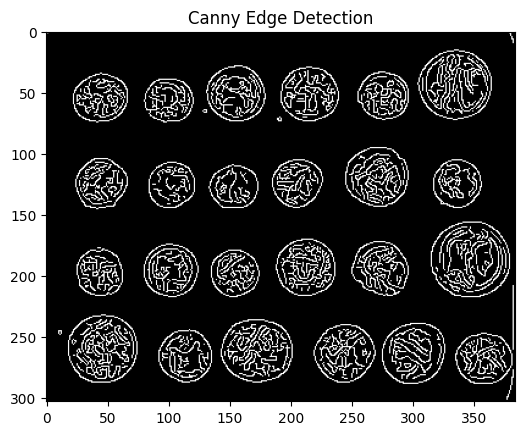

In [18]:
from skimage.feature import canny

# Apply Canny Edge Detection
edges = canny(image)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

### Hough Circle Transform

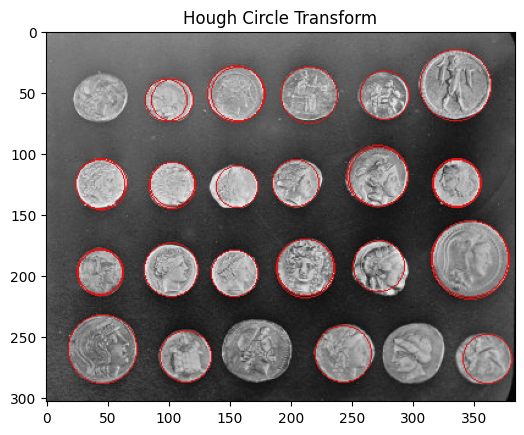

In [19]:
from skimage import data, color
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
import matplotlib.pyplot as plt

# Apply Canny edge detection (optional but often improves results)
edges = canny(image, sigma=3)

# Detecting circles using Hough Transform
hough_radii = np.arange(5, 50, 1)  # Range of potential radii
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=30)

# Draw them on the image
fig, ax = plt.subplots()
image_color = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image_color[circy, circx] = (220, 20, 20)

ax.imshow(image_color)
ax.set_title('Hough Circle Transform')
plt.show()


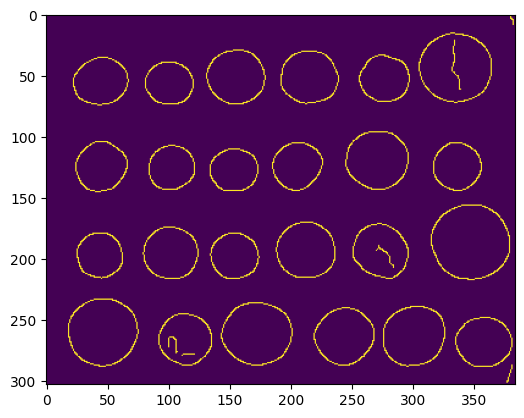

In [20]:
plt.imshow(edges)

### Gabor Filter

In [21]:
from skimage import data, io, filters
import matplotlib.pyplot as plt
import numpy as np

# Load the 'coins' image
coins_image = data.coins()

In [22]:
def apply_gabor_filter(image, frequency, theta):
    """
    Apply a Gabor filter to an image with specified frequency and orientation (theta).
    """
    # Generate Gabor kernel
    gabor_kernel = filters.gabor_kernel(frequency, theta=theta)

    # Filter the image using the real part of the Gabor kernel
    filtered_image = filters.gabor(image, frequency=frequency, theta=theta)[0]

    return filtered_image

# Define frequencies and orientations for the Gabor filters
frequencies = [0.1, 0.2, 0.3]
thetas = [0, np.pi/4, np.pi/2]

# Apply Gabor filters and store results
filtered_images = []
for frequency in frequencies:
    for theta in thetas:
        filtered_img = apply_gabor_filter(coins_image, frequency, theta)
        filtered_images.append((filtered_img, frequency, theta))


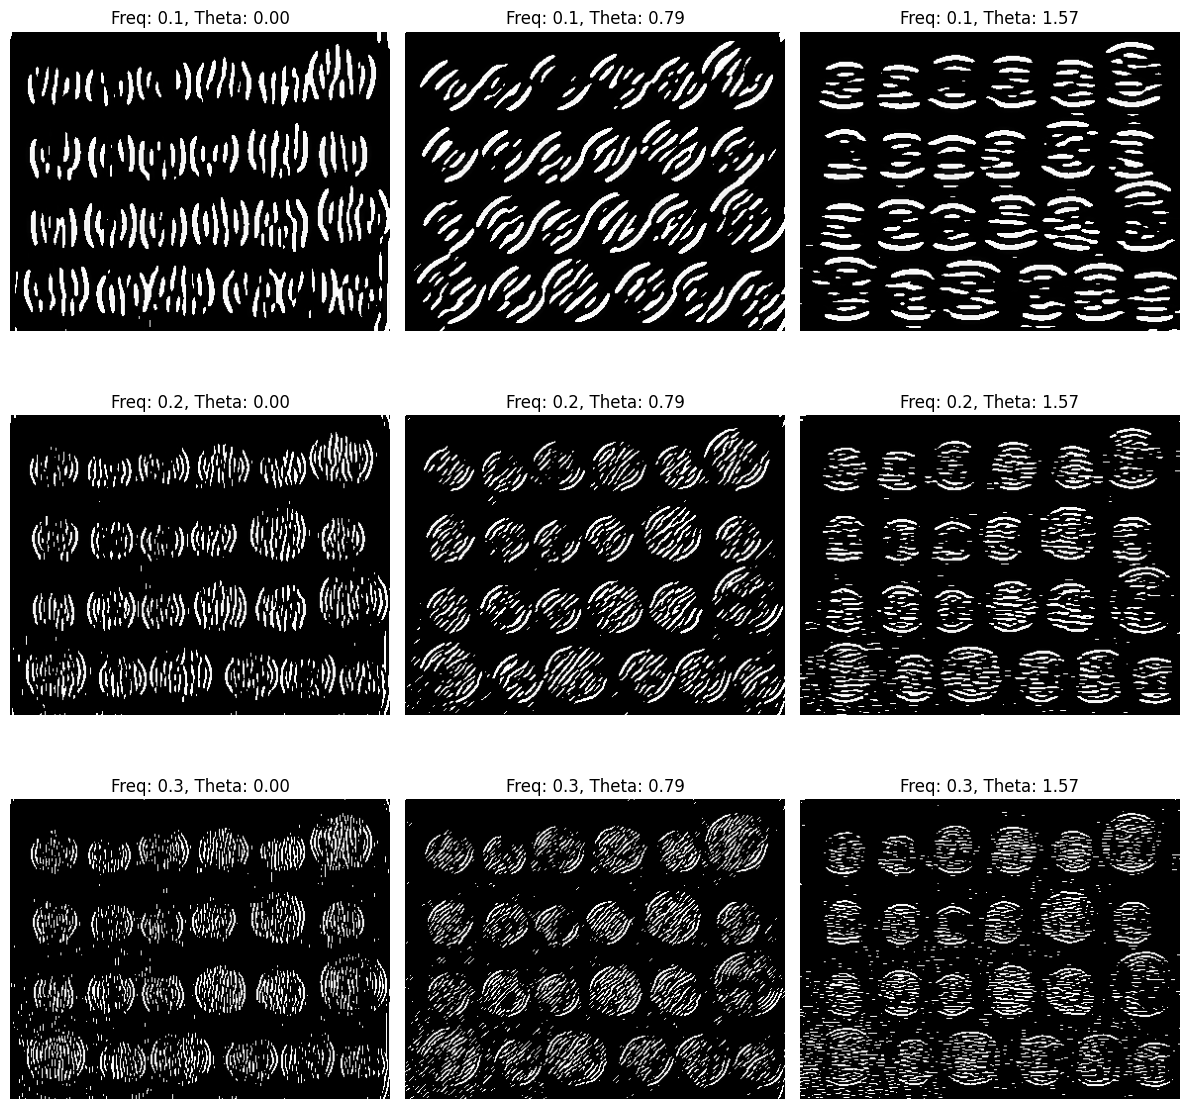

In [23]:
# Plot the filtered images in a 3x3 grid
plt.figure(figsize=(12, 12))

# Choose a subset of filters for visualization
selected_filters = filtered_images[:9]

for i, (filtered_img, frequency, theta) in enumerate(selected_filters, 1):
    plt.subplot(3, 3, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Freq: {frequency}, Theta: {theta:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

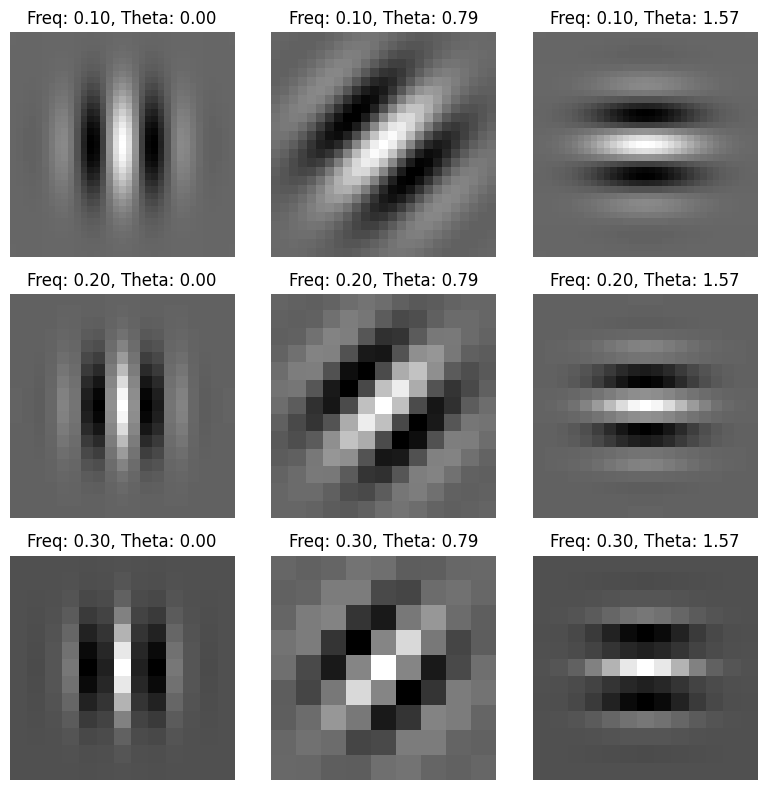

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor_kernel

# Define frequencies and orientations (thetas)
frequencies = [0.1, 0.2, 0.3]  # First three frequencies
thetas = [0, np.pi/4, np.pi/2]  # First three orientations

plt.figure(figsize=(8, 8))

# Iterate over frequencies and thetas to create and plot Gabor kernels
for i, frequency in enumerate(frequencies):
    for j, theta in enumerate(thetas):
        # Create Gabor kernel
        gabor_real = np.real(gabor_kernel(frequency, theta=theta))

        # Plotting
        plt.subplot(len(frequencies), len(thetas), i * len(thetas) + j + 1)
        plt.imshow(gabor_real, cmap='gray')
        plt.title(f'Freq: {frequency:.2f}, Theta: {theta:.2f}')
        plt.axis('off')

plt.tight_layout()
plt.show()


### MNIST

Train labels:  {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}
Test labels:  {np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}


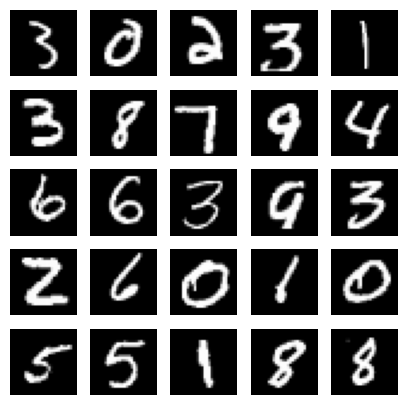

In [25]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

# MNIST Multi-Layer Perceptron (MLP)

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [27]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the network and record its history.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7683 - loss: 0.7253 - val_accuracy: 0.9547 - val_loss: 0.1460
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9390 - loss: 0.2083 - val_accuracy: 0.9671 - val_loss: 0.1050
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9538 - loss: 0.1528 - val_accuracy: 0.9734 - val_loss: 0.0865
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9617 - loss: 0.1274 - val_accuracy: 0.9747 - val_loss: 0.0802
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9664 - loss: 0.1068 - val_accuracy: 0.9775 - val_loss: 0.0783
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9671 - loss: 0.1027 - val_accuracy: 0.9771 - val_loss: 0.0704
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9713 - loss: 0.0918 - val_accuracy: 0.9779 - val_loss: 0.0707
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9740 - loss: 0.0861 - val_accura

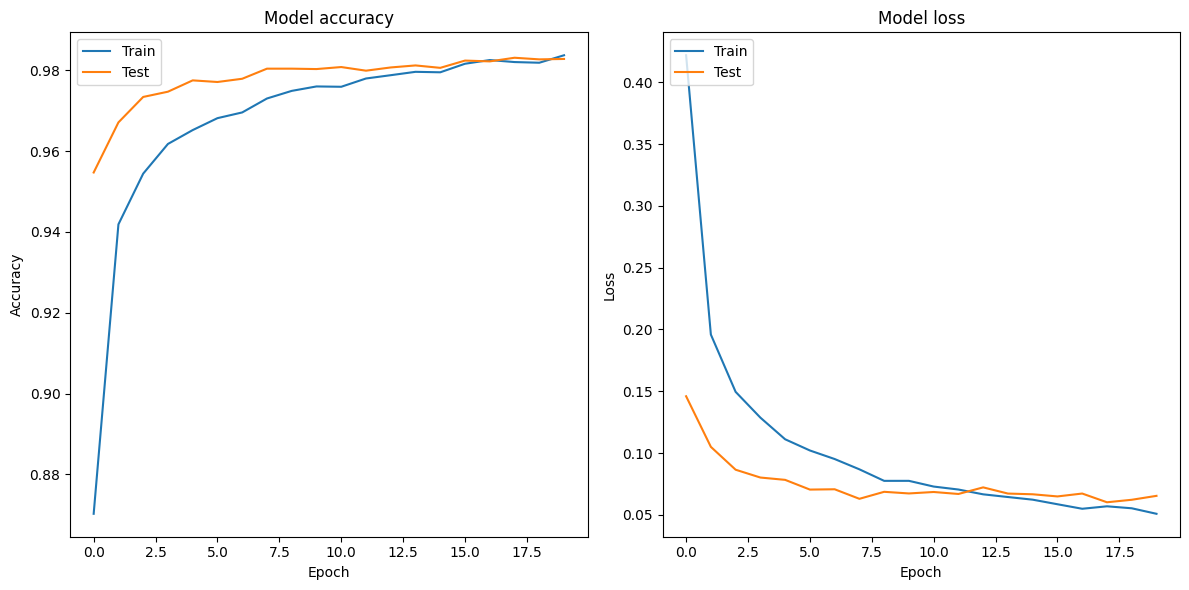

In [28]:
# Plot training & validation accuracy values
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


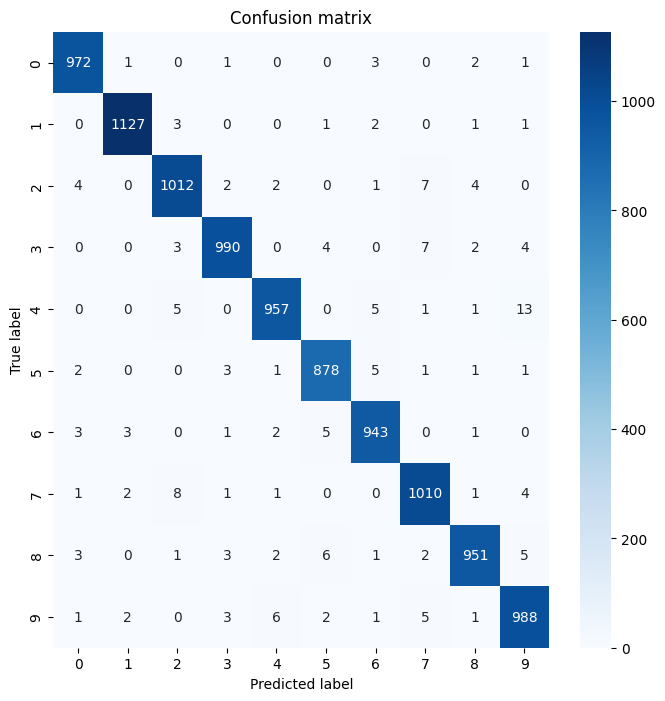

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get model's predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# MNIST DCNN

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]

# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                   verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 164ms/step - accuracy: 0.8222 - loss: 0.5943
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 160ms/step - accuracy: 0.9766 - loss: 0.0751
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 164ms/step - accuracy: 0.9860 - loss: 0.0465
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 164ms/step - accuracy: 0.9879 - loss: 0.0380
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 165ms/step - accuracy: 0.9907 - loss: 0.0301
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9920 - loss: 0.0264
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.9927 - loss: 0.0218
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 162ms/step - accuracy: 0.9933 - loss: 0.0202
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 158ms/step - accuracy: 0.9943 - loss: 0.0170
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 161ms/step - accuracy: 0.9950 - loss: 0.0155

Test accuracy: 99.0%


## Do features matter?

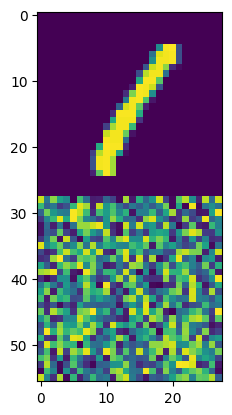

In [31]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNIST data.
(train_images, train_labels), _ = mnist.load_data()

# Flattening the images and normalizing pixel values to be between 0 and 1.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Concatenating the training images with a random noise channel, essentially doubling the dataset size.
# The second half of the data for each image will just be noise.
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# Concatenating the training images with a channel of zeros.
# The second half of the data for each image will just be zeros.
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


train_images_with_noise_channels.shape


# Visualizing one of the noise images
plt.imshow(train_images_with_noise_channels[3].reshape(56,28))

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

# Defining a function that will create our model.
def get_model():
    # Defining the structure of the model.
    model = keras.Sequential([
        # The first layer of the model is a dense layer with 512 units and 'relu' activation function.
        layers.Dense(512, activation="relu"),
        # The second (output) layer of the model is a dense layer with 10 units and 'softmax' activation function.
        layers.Dense(10, activation="softmax")
    ])
    # Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
    # and we want to track 'accuracy' metric.
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Training the model on the noisy data.
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# Training the model on the zero-channel data.
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6917 - loss: 1.0951 - val_accuracy: 0.9053 - val_loss: 0.3001
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9125 - loss: 0.2824 - val_accuracy: 0.9381 - val_loss: 0.2061
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9445 - loss: 0.1815 - val_accuracy: 0.9363 - val_loss: 0.2042
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9612 - loss: 0.1289 - val_accuracy: 0.9507 - val_loss: 0.1590
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9722 - loss: 0.0899 - val_accuracy: 0.9623 - val_loss: 0.1282
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9805 - loss: 0.0618 - val_accuracy: 0.9455 - val_loss: 0.1796
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9845 - loss: 0.0484 - val_accuracy: 0.9645 - val_loss: 0.1307
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9902 - loss: 0.0325 - val_

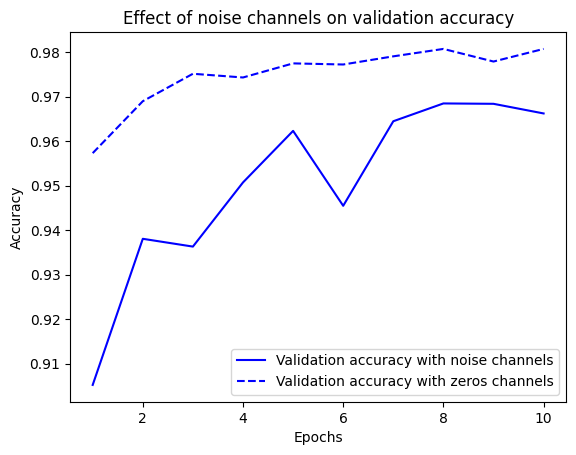

In [33]:
# Extracting the validation accuracy from the training history for both models.
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

# The range of epochs we trained for, to be used as the x-axis in the plot.
epochs = range(1, 11)

# Plotting the validation accuracy of the models trained on noisy data and zero-channel data over the epochs.
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Tuning Network Structure

In [34]:
(train_images, train_labels), _ = mnist.load_data()

# Reshaping the images and normalizing pixel values.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Shuffling the labels randomly. The labels no longer match the images.
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and randomly shuffled labels.
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

# Making predictions on the train images.
output = model.predict(train_images)

# Checking the shapes of the output.
output.shape
output.argmax(axis = 1).shape

# Checking how often the model's predictions match the shuffled labels.
(output.argmax(axis = 1) == random_train_labels).mean()

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1052 - loss: 2.3314 - val_accuracy: 0.1067 - val_loss: 2.3050
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1197 - loss: 2.2976 - val_accuracy: 0.1041 - val_loss: 2.3092
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1296 - loss: 2.2886 - val_accuracy: 0.1023 - val_loss: 2.3172
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1400 - loss: 2.2752 - val_accuracy: 0.0976 - val_loss: 2.3305
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1548 - loss: 2.2606 - val_accuracy: 0.0998 - val_loss: 2.3360
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1672 - loss: 2.2388 - val_accuracy: 0.0978 - val_loss: 2.3482
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1826 - loss: 2.2187 - val_accuracy: 0.0973 - val_loss: 2.3639
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1975 - loss: 2.1889 - 

np.float64(0.7509666666666667)

In [35]:
output = model.predict(train_images)
output.shape

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


(60000, 10)

In [36]:
output.argmax(axis = 1).shape

(60000,)

In [37]:
(output.argmax(axis = 1) == random_train_labels).mean()

np.float64(0.7509666666666667)

In [38]:
(train_images, train_labels), _ = mnist.load_data()

# Reshaping the images and normalizing pixel values.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer with high learning rate (1),
# sparse categorical cross entropy as loss function, and we want to track 'accuracy' metric.
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3845 - loss: 2678.8142 - val_accuracy: 0.1858 - val_loss: 2.6720
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1631 - loss: 2.8722 - val_accuracy: 0.1728 - val_loss: 2.6226
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1614 - loss: 2.7275 - val_accuracy: 0.1449 - val_loss: 2.2608
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1630 - loss: 2.5578 - val_accuracy: 0.1443 - val_loss: 2.4007
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1605 - loss: 2.4216 - val_accuracy: 0.1704 - val_loss: 2.4883
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1774 - loss: 2.3292 - val_accuracy: 0.2160 - val_loss: 2.1866
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2059 - loss: 2.3756 - val_accuracy: 0.2312 - val_loss: 2.3861
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2015 - loss: 2.7996 - val_a

In [39]:
# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer with low learning rate (1e-2),
# sparse categorical cross entropy as loss function, and we want to track 'accuracy' metric.
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8365 - loss: 0.7975 - val_accuracy: 0.9490 - val_loss: 0.1674
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9633 - loss: 0.1272 - val_accuracy: 0.9551 - val_loss: 0.1750
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9737 - loss: 0.0966 - val_accuracy: 0.9690 - val_loss: 0.1441
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9792 - loss: 0.0767 - val_accuracy: 0.9713 - val_loss: 0.1477
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9833 - loss: 0.0634 - val_accuracy: 0.9718 - val_loss: 0.1604
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9865 - loss: 0.0523 - val_accuracy: 0.9751 - val_loss: 0.1649
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9869 - loss: 0.0560 - val_accuracy: 0.9688 - val_loss: 0.2231
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9888 - loss: 0.0446 - val_accu

In [40]:
# Building a very simple model with only an output layer.
model = keras.Sequential([layers.Dense(10, activation="softmax")])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7416 - loss: 1.0491 - val_accuracy: 0.9018 - val_loss: 0.3604
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9001 - loss: 0.3729 - val_accuracy: 0.9144 - val_loss: 0.3082
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9103 - loss: 0.3198 - val_accuracy: 0.9199 - val_loss: 0.2912
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9134 - loss: 0.3092 - val_accuracy: 0.9218 - val_loss: 0.2841
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9205 - loss: 0.2876 - val_accuracy: 0.9227 - val_loss: 0.2788
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9217 - loss: 0.2875 - val_accuracy: 0.9246 - val_loss: 0.2750
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.2793 - val_accuracy: 0.9259 - val_loss: 0.2713
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9239 - loss: 0.2698 - val_accuracy: 0.

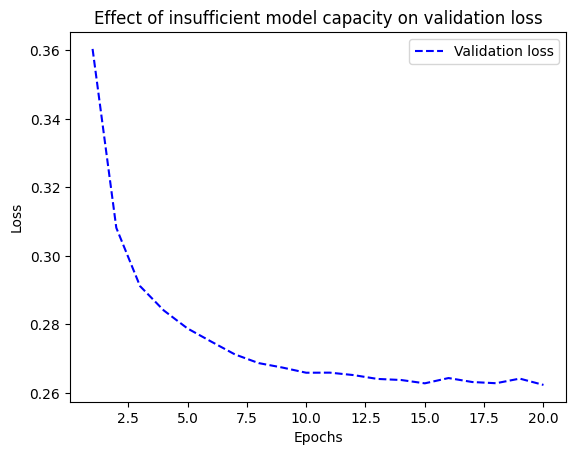

In [41]:
import matplotlib.pyplot as plt

# Plotting the validation loss of the model with insufficient capacity.
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [42]:
# Building a larger model with two hidden layers and an output layer.
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8255 - loss: 0.6271 - val_accuracy: 0.9470 - val_loss: 0.1816
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9496 - loss: 0.1712 - val_accuracy: 0.9585 - val_loss: 0.1415
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9659 - loss: 0.1165 - val_accuracy: 0.9653 - val_loss: 0.1101
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9733 - loss: 0.0896 - val_accuracy: 0.9656 - val_loss: 0.1116
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9799 - loss: 0.0700 - val_accuracy: 0.9710 - val_loss: 0.1033
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9847 - loss: 0.0537 - val_accuracy: 0.9728 - val_loss: 0.0948
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9863 - loss: 0.0475 - val_accuracy: 0.9732 - val_loss: 0.0939
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9881 - loss: 0.0372 - val_accuracy: 0.

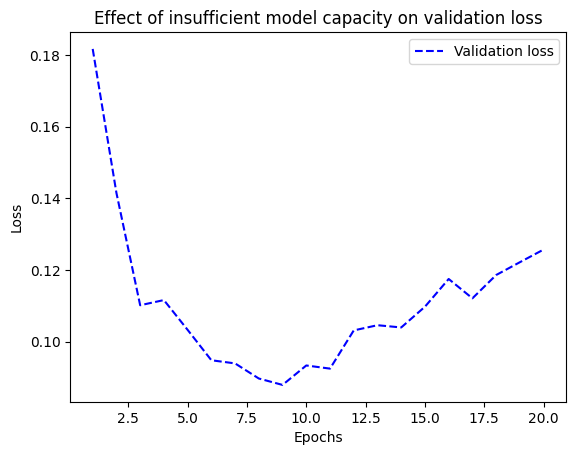

In [43]:
import matplotlib.pyplot as plt

# Plotting the validation loss of the larger model.
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Loss Functions

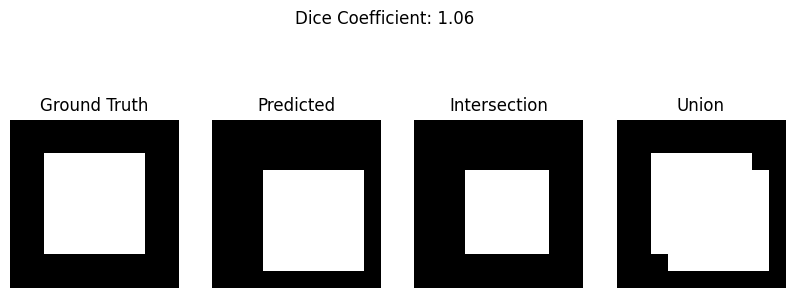

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create a synthetic 'ground truth' segmentation and a 'predicted' segmentation
ground_truth = np.zeros((10, 10))
predicted = np.zeros((10, 10))

ground_truth[2:8, 2:8] = 1  # Ground truth object
predicted[3:9, 3:9] = 1     # Predicted object

# Calculate intersection and union for illustration purposes
intersection = np.logical_and(ground_truth, predicted)
union = np.logical_or(ground_truth, predicted)
dice_coeff = 2 * np.sum(intersection) / np.sum(union)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(ground_truth, cmap='gray')
axs[0].set_title('Ground Truth')
axs[0].axis('off')

axs[1].imshow(predicted, cmap='gray')
axs[1].set_title('Predicted')
axs[1].axis('off')

axs[2].imshow(intersection, cmap='gray')
axs[2].set_title('Intersection')
axs[2].axis('off')

axs[3].imshow(union, cmap='gray')
axs[3].set_title('Union')
axs[3].axis('off')

fig.suptitle(f'Dice Coefficient: {dice_coeff:.2f}')
plt.show()


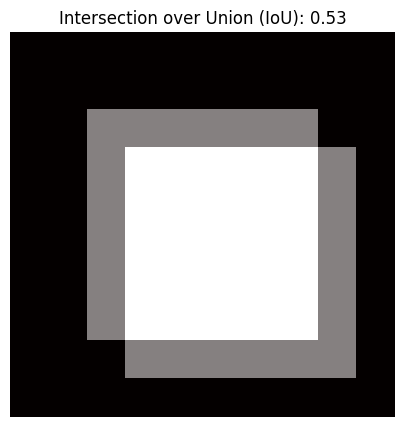

In [45]:
# Plotting Intersection over Union
iou = np.sum(intersection) / np.sum(union)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(union, cmap='gray')
ax.imshow(intersection, cmap='hot', alpha=0.5)  # Overlay intersection
ax.set_title(f'Intersection over Union (IoU): {iou:.2f}')
ax.axis('off')
plt.show()
